# 1. Classification

Presentation of some algorithms. We will here use some classifiers commonly used. The classifiers we compare here are the following :
- [The K-Nearest Neighbors (KNN) Classifier](#1.1-K-Nearest-Neighbors)
- [Support Vector Machine (SVM)](#1.2-Support-Vector-Machine)
- [Gaussian Process Classifier](#1.3-Gaussian-Process-Classifier)
- [Decision Tree Classifier](#1.4-Decision-Tree-Classifier)
- [Random Forest Classifier](#1.5-Random-Forest-Classifier)
- [The Ada Boost Classifier](#1.6-Ada-Boost-Classifier)
- [Naive Bayes Classifier](#1.7-Naive-Bayes-Classifier)


## 1.1 K-Nearest Neighbors
...

## 1.2 Support Vector Machine
...

## 1.3 Gaussian Process Classifier
...

## 1.4 Decision Tree Classifier
...

## 1.5 Random Forest Classifier
...

## 1.6 Ada Boost Classifier
...

## 1.7 Naive Bayes Classifier
...

In [5]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [29]:
from lblearn.datasets import load_galaxies
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

galaxies = load_galaxies(n_samples=100)

In [34]:
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
dataset = {}
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    # disp = ConfusionMatrixDisplay.from_predictions
    cm = confusion_matrix(y_test, predicted)

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
    y_true = []
    y_pred = []
    for gt in range(len(cm)):
        for pred in range(len(cm)):
            y_true += [gt] * cm[gt][pred]
            y_pred += [pred] * cm[gt][pred]

    print(
        f"Classification report rebuilt from confusion matrix for {name}:\n"
        f"{classification_report(y_true, y_pred)}\n"
    )
    score = accuracy_score(y_test, y_pred)
    dataset[name] = score

Classification report rebuilt from confusion matrix for Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        44
           1       0.79      0.95      0.86        39
           2       0.76      0.43      0.55        37

    accuracy                           0.78       120
   macro avg       0.78      0.77      0.76       120
weighted avg       0.78      0.78      0.76       120


Classification report rebuilt from confusion matrix for Linear SVM:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.75      1.00      0.86        39
           2       0.94      0.46      0.62        37

    accuracy                           0.82       120
   macro avg       0.84      0.80      0.79       120
weighted avg       0.84      0.82      0.80       120


Classification report rebuilt from confusion matrix for RBF SVM:
              precision    r

In [42]:
output = classification_report(y_true, y_pred)
# Supprimez les retours à la ligne et les espaces en début et en fin de chaîne
output = output.strip()

# Divisez la chaîne de caractères en lignes
lines = output.split('\n')

# Divisez chaque ligne en colonnes
data = [line.split() for line in lines]
data[1:-1]
# Créez une liste de listes qui représente les données de la table
#table_data = [data[0]] + [[float(x) if '.' in x else int(x) for x in row] for row in data[1:-1]] + [data[-1]]

# Créez une DataFrame pandas à partir de cette liste de listes
#df = pd.DataFrame(table_data[1:], columns=table_data[0])

# Affichez la DataFrame pandas à l'aide de la méthode display()
#display(df)


[[],
 ['0', '0.89', '0.93', '0.91', '44'],
 ['1', '0.88', '0.92', '0.90', '39'],
 ['2', '0.82', '0.73', '0.77', '37'],
 [],
 ['accuracy', '0.87', '120'],
 ['macro', 'avg', '0.86', '0.86', '0.86', '120']]

In [19]:
dataset = dict(reversed(sorted(dataset.items(), key=lambda item: item[1])))

In [23]:
import pandas as pd
from IPython.display import display, HTML
# Créer un dataframe de test
#df = pd.DataFrame({'Nom': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]})
df_scores = pd.DataFrame(dataset.items(), columns=['Algorithm', 'Score'])
# Afficher le dataframe en Markdown
df_scores

,Algorithm,Score
0,Neural Net,0.875000
1,QDA,0.866667
2,AdaBoost,0.866667
3,Gaussian Process,0.866667
4,Decision Tree,0.858333
5,Naive Bayes,0.841667
6,Random Forest,0.841667
7,Linear SVM,0.816667
8,RBF SVM,0.783333
9,Nearest Neighbors,0.783333


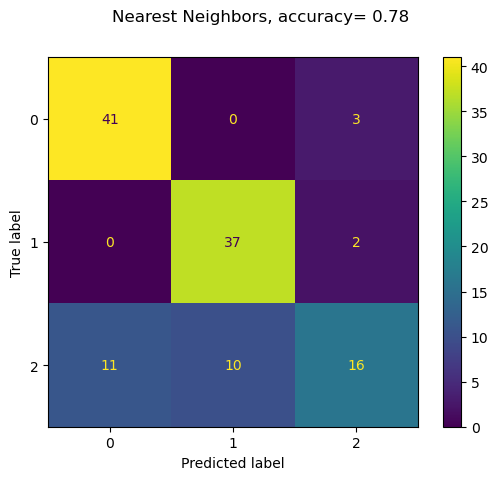

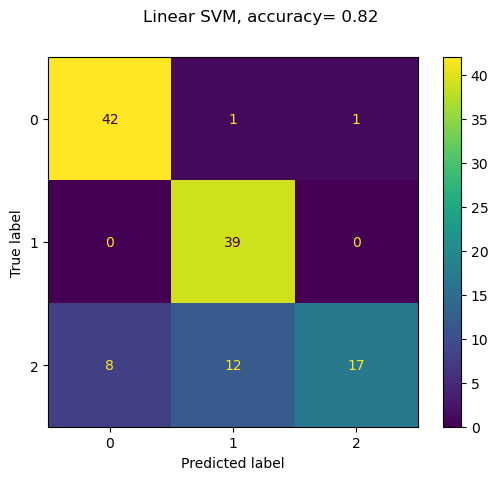

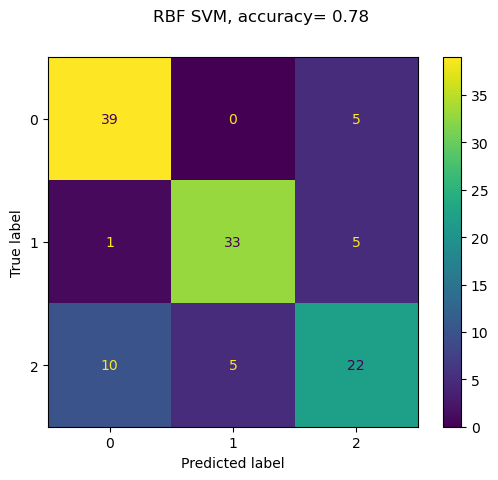

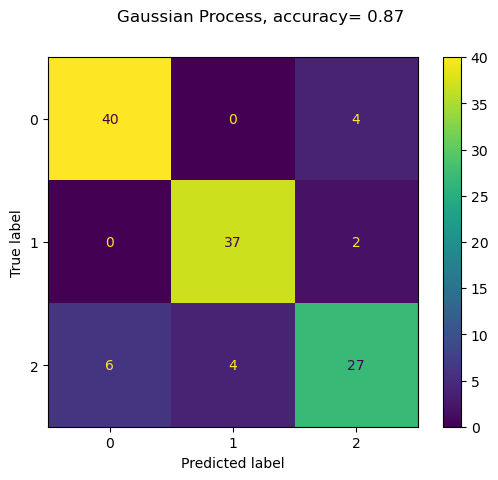

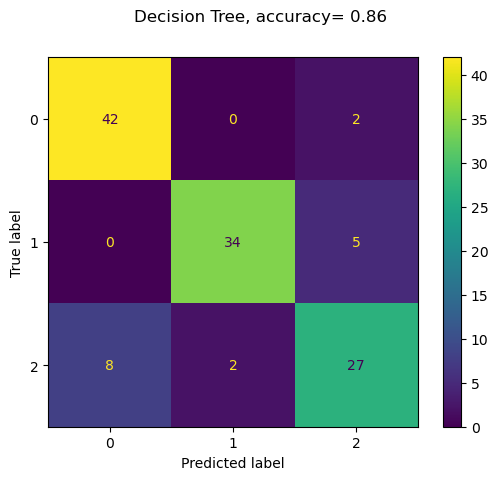

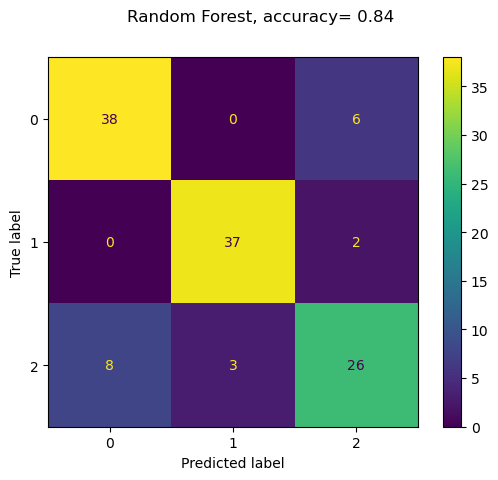

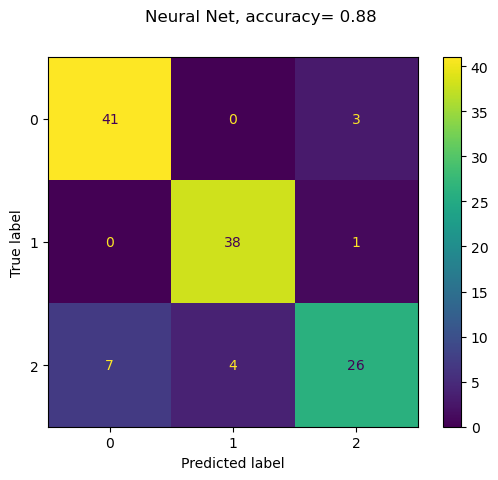

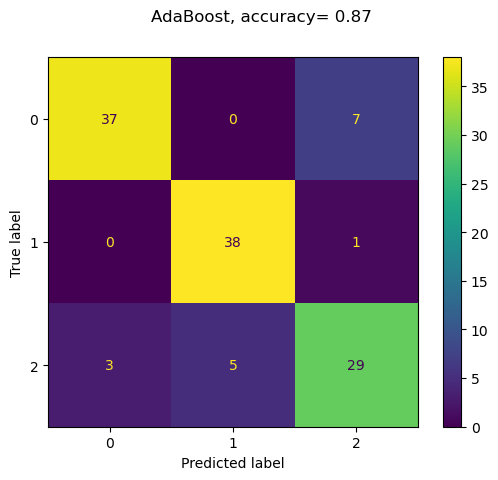

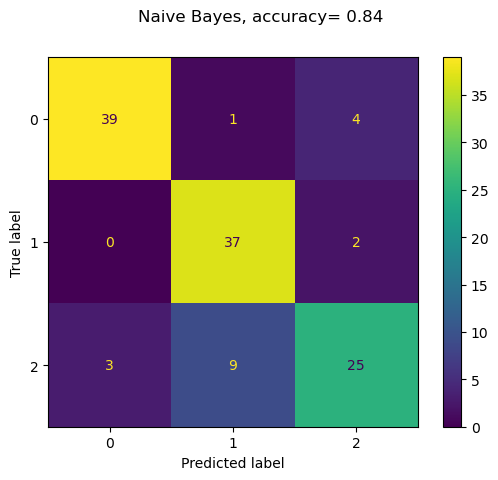

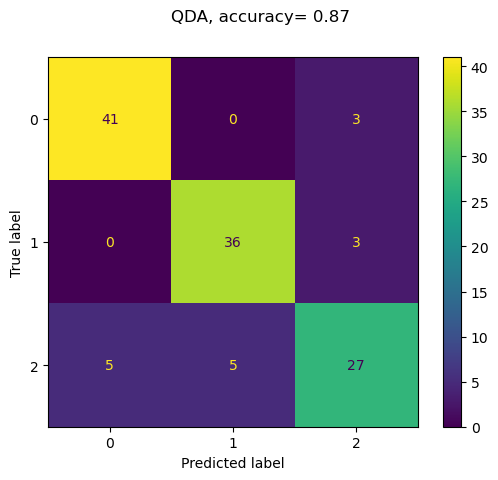

In [27]:
# preprocess dataset, split into training and test part
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    #print(f"Confusion matrix:\n{disp.confusion_matrix}")
    disp.figure_.suptitle(f"{name}, accuracy={score: .2f}");
    #plt.imshow(confusion_matrix(y_test, y_pred),cmap='Blues', interpolation='nearest')
    #plt.grid(False)
    #plt.ylabel('True')
    #plt.xlabel('Predicted');

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[11] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature.[12] The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).

/var/folders/t9/37s2572n4y1bwsj0j2rb1zrm0000gn/T/ipykernel_9443/253768459.py:70: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


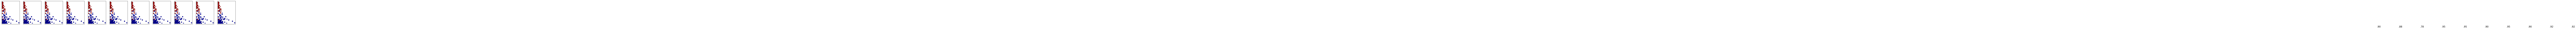

In [16]:
figure = plt.figure(figsize=(27, 9))
i = 1
x_index = 5
y_index = 7
# preprocess dataset, split into training and test part
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, x_index], X_train[:, y_index], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, x_index], X_test[:, y_index], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
#ax.set_xlim(x_min, x_max)
#ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
i += 1

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #DecisionBoundaryDisplay.from_estimator(
        #clf, X[:, 2:4], cmap=cm, alpha=0.8, ax=ax, eps=0.5
    #)

    # Plot the training points
    ax.scatter(
        X_train[:, x_index], X_train[:, y_index], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, x_index],
        X_test[:, y_index],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    #ax.set_xlim(x_min, x_max)
    #ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(
        x_max - 0.3,
        y_min + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
plt.show()